<a href="https://colab.research.google.com/github/MiniRedTrout/Integration/blob/main/Num7_Integral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание №7. Вычисление определённого интеграла**

   f(x) = 0.5 cos(2x) exp(2x/5) + 2.4 sin(1.5x) exp(−6x) + 6x ,


a = 1.1, b = 2.5, α = 2/5, β = 0;

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
a = 1.1
b = 2.5
alpha = 0.4
beta = 0

def f(x):#Вычисляю функцию
  return 0.5*np.cos(2*x)*np.exp(2*x/5)+2.4*np.sin(1.5*x)*np.exp(-6*x)+6*x
x = sp.Symbol('x')
result = sp.integrate(sp.cos(2*x)*0.5*sp.exp(2*x/5)+2.4*sp.sin(1.5*x)*sp.exp(-6*x)+6*x,(x,a,b))
print(f"Интеграл: {result}")

Интеграл: 14.2731409024335


In [ ]:
def abs_metr(test_result):    #Абсолютная погрешность
  return abs(result - test_result)

In [ ]:
x = np.linspace(a,b,1000)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x,y=f(x), name='f(x)=0.5*cos(2x)*e^(0.4x)+2.4*sin(1.5x)*e^(-6x)+6x', marker=dict(color='LightSkyBlue', size=40, line=dict(color='MediumPurple', width=30))))
fig.update_layout(title='f(x) plot', xaxis_title='x', yaxis_title='y')
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")

# **Часть №1: Квадратурные формулы Ньютона-Котеса и Гаусса**

# 1.1

**Реализовать методы вычисления определённого интеграла с использованием
составных квадратурных формул: средних и левых прямоугольников, трапеции, Симпсона.**

In [ ]:
print("Метод средних прямоугольников")
def middle_rectangle(a,b,n):
    h = (b-a)/n
    x = np.linspace(a+0.5*h,a+(n-0.5)*h,n)
    return np.sum(f(x)) * h
print(f"Интеграл: {middle_rectangle(a,b,1000)}")


Метод средних прямоугольников
Интеграл: 14.27314055789239


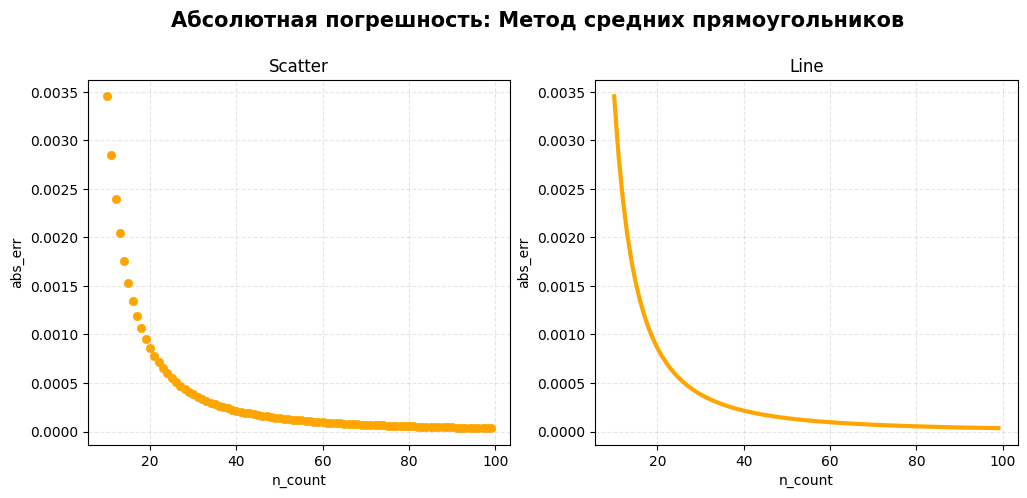

In [ ]:
arr = [abs_metr(middle_rectangle(a,b,i)) for i in range(10,100)]
fig, axes = plt.subplots(figsize=(12,5), ncols=2)

axes[0].scatter(x=range(10,100), y=arr,color='orange',linewidth=0.5)
axes[0].set_title('Scatter')
axes[0].set_xlabel('n_count')
axes[0].set_ylabel('abs_err')
axes[1].plot(range(10,100), arr,color='orange',linewidth=3)
axes[1].set_title('Line')
axes[1].set_xlabel('n_count')
axes[1].set_ylabel('abs_err')
plt.suptitle('Абсолютная погрешность: Метод средних прямоугольников',fontweight='bold',fontsize=15)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[1].grid(True, alpha=0.3, linestyle='--')
plt.subplots_adjust(top=0.84)

In [ ]:
print("Метод левых прямоугольников")
def left_rectangle(a,b,n):
  h = (b-a)/n
  x = np.linspace(a,a+(n-1)*h,n)
  return np.sum(f(x)) * h
print(f"Интеграл: {left_rectangle(a,b,1000)}")

Метод левых прямоугольников
Интеграл: 14.266674174769154


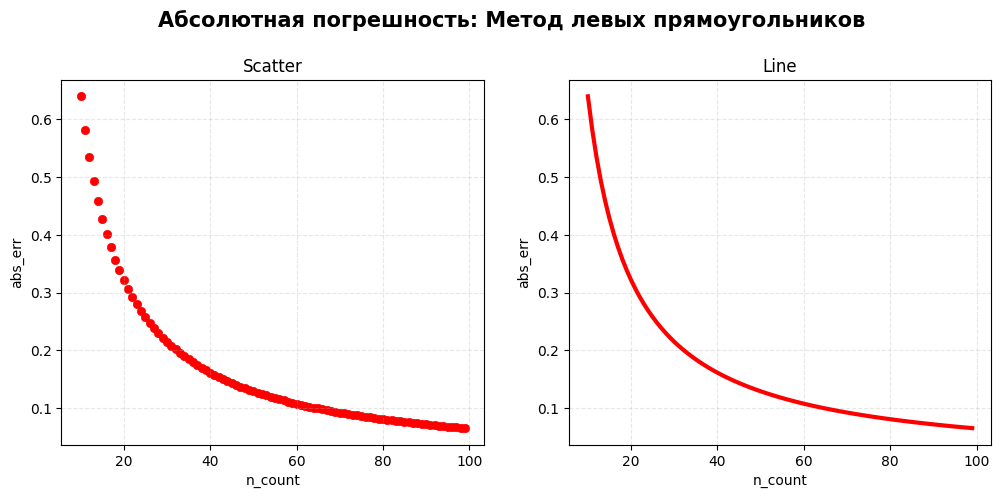

In [ ]:
arr = [abs_metr(left_rectangle(a,b,i)) for i in range(10,100)]
fig, axes = plt.subplots(figsize=(12,5), ncols=2)

axes[0].scatter(x=range(10,100), y=arr,color='red',linewidth=0.5)
axes[0].set_title('Scatter')
axes[0].set_xlabel('n_count')
axes[0].set_ylabel('abs_err')
axes[1].plot(range(10,100), arr,color='red',linewidth=3)
axes[1].set_title('Line')
axes[1].set_xlabel('n_count')
axes[1].set_ylabel('abs_err')
plt.suptitle('Абсолютная погрешность: Метод левых прямоугольников',fontweight='bold',fontsize=15)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[1].grid(True, alpha=0.3, linestyle='--')
plt.subplots_adjust(top=0.84)

In [ ]:
print("Метод трапеции")
def trap(a,b,n):
  h = (b-a)/n
  x = np.linspace(a+h,a+(n-2)*h,n-2)
  return (f(a)+f(b)+2*np.sum(f(x)))*h/2
print(f"Интеграл: {trap(a,b,1000)}")

Метод трапеции
Интеграл: 14.251619010883356


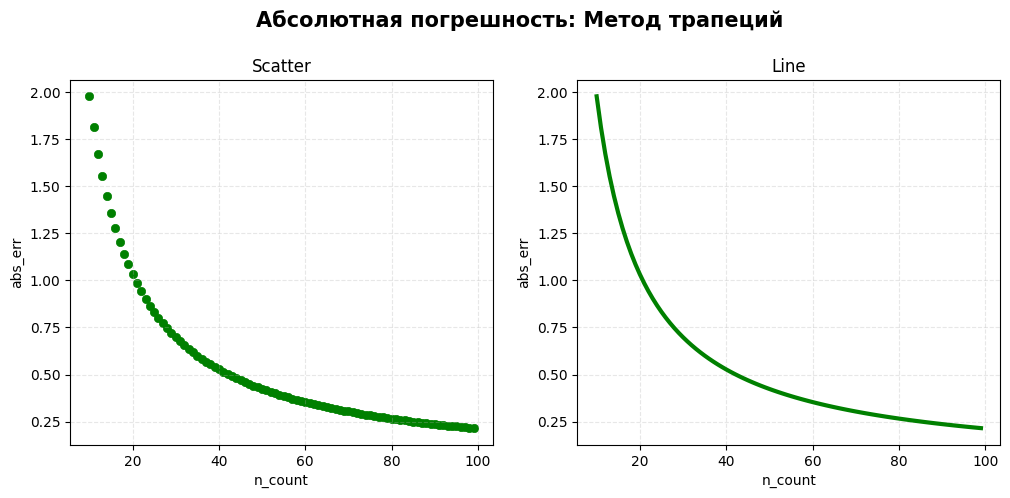

In [ ]:
arr = [abs_metr(trap(a,b,i)) for i in range(10,100)]
fig, axes = plt.subplots(figsize=(12,5), ncols=2)

axes[0].scatter(x=range(10,100), y=arr,color='green',linewidth=0.5)
axes[0].set_title('Scatter')
axes[0].set_xlabel('n_count')
axes[0].set_ylabel('abs_err')
axes[1].plot(range(10,100), arr,color='green',linewidth=3)
axes[1].set_title('Line')
axes[1].set_xlabel('n_count')
axes[1].set_ylabel('abs_err')
plt.suptitle('Абсолютная погрешность: Метод трапеций',fontweight='bold',fontsize=15)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[1].grid(True, alpha=0.3, linestyle='--')
plt.subplots_adjust(top=0.84)

In [ ]:
print("Метод Симпсона")
def sympson(a,b,n):
  h = (b-a)/n
  x = np.linspace(a+h,a+(n-1)*h,n-2)
  x1 = x[::2]
  x2 = x[1::2]
  return h/3 * (f(a) + f(b) + 2*np.sum(f(x1))+4*np.sum(f(x2)))
print(f"Интеграл: {sympson(a,b,1000)}")

Метод Симпсона
Интеграл: 14.255999572286768


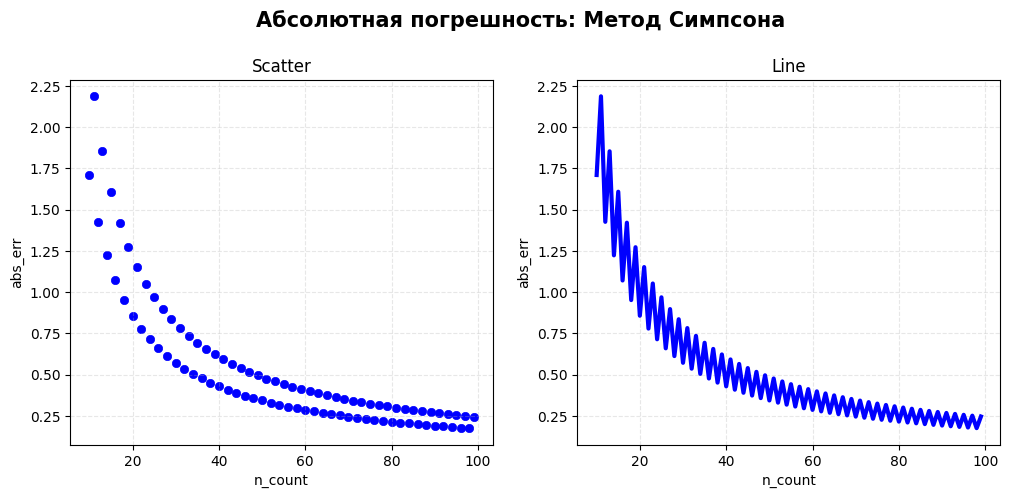

In [ ]:
arr = [abs_metr(sympson(a,b,i)) for i in range(10,100)]
fig, axes = plt.subplots(figsize=(12,5), ncols=2)

axes[0].scatter(x=range(10,100), y=arr,color='blue',linewidth=0.5)
axes[0].set_title('Scatter')
axes[0].set_xlabel('n_count')
axes[0].set_ylabel('abs_err')
axes[1].plot(range(10,100), arr,color='blue',linewidth=3)
axes[1].set_title('Line')
axes[1].set_xlabel('n_count')
axes[1].set_ylabel('abs_err')
plt.suptitle('Абсолютная погрешность: Метод Симпсона',fontweight='bold',fontsize=15)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[1].grid(True, alpha=0.3, linestyle='--')
plt.subplots_adjust(top=0.84)

# 1.2

**Реализовать методы вычисления определённого интеграла с использованием составных квадратурных формул на базе 3x точечных формул Ньютона-Кот(е)са и Гаусса.**

В качестве подынтегральной функции взять функцию F(x) = p(𝑥)*f(x), где
f(x) и p(x)=(x−a^(−𝛼)*(b−x)^(−𝛽)

: J(F)=|(F(x)dx = |(f(x)/((x-a)^𝛼*(b-x)^𝛽)

Примечание: узлы каждой малой 3-х-точечной квадратурной формулы Гаусса находить с помощью формул Кардано.
a = 1.1, b = 2.5, α = 2/5, β = 0;

In [ ]:
#Вес
def p(x):
  return 1/((x-a)**(alpha))

In [ ]:
from scipy.integrate import quad
def f2(x):#Вычисляю функцию
    numerator = (0.5 * np.cos(2*x) * np.exp(2*x/5) +
                2.4 * np.sin(1.5*x) * np.exp(-6*x) +
                6*x)
    denominator = np.abs(x - 1.1)**0.4
    return numerator / denominator * np.sign(x - 1.1)
result,err = quad(f2,a,b,points=[1.1], limit=1000, full_output=0)
print(f"Интеграл: {result:.10f}")

Интеграл: 18.6029478573


In [ ]:
x = np.linspace(a,b,1000)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x,y=f2(x), name='f(x)=(0.5*cos(2x)*e^(0.4x)+2.4*sin(1.5x)*e^(-6x)+6x)*P(x)', marker=dict(color='LightSkyBlue', size=40, line=dict(color='MediumPurple', width=30))))
fig.update_layout(title='f(x) plot', xaxis_title='x', yaxis_title='y')
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")

/tmp/ipython-input-4237039695.py:7: RuntimeWarning:

divide by zero encountered in divide

/tmp/ipython-input-4237039695.py:7: RuntimeWarning:

invalid value encountered in multiply



**1. Составная квадратурная формула Гаусса (3 точки)**

In [ ]:
#Решение системы уравнений Гауссом
def gaussian_elimination(A, b):
    n = A.shape[0]

    Ab = np.hstack([A.astype(float), b.reshape(-1, 1).astype(float)])

    for i in range(n):
        max_row = np.argmax(np.abs(Ab[i:, i])) + i
        if max_row != i:
            Ab[[i, max_row]] = Ab[[max_row, i]]

        pivot = Ab[i, i]
        Ab[i] = Ab[i] / pivot

        for j in range(i + 1, n):
            factor = Ab[j, i]
            Ab[j] = Ab[j] - factor * Ab[i]
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = Ab[i, n] - np.dot(Ab[i, i+1:n], x[i+1:n])

    return x

In [ ]:
#Моменты вычисляю
def moment(a_s,b_s,n):
  mu = np.zeros(2*n)
  for i in range(2*n):
      integrand = lambda x: p(x) * x**i
      mu[i], _ = quad(integrand, a_s, b_s)
  return mu

In [ ]:
#Корни методом Кардано
def cardano_method(coeffs):
    a, b, c, d = coeffs

    p = (3*a*c - b**2) / (3*a**2)
    q = (2*b**3 - 9*a*b*c + 27*a**2*d) / (27*a**3)

    discriminant = (q/2)**2 + (p/3)**3

    if discriminant > 0:
        u = np.cbrt(-q/2 + np.sqrt(discriminant))
        v = np.cbrt(-q/2 - np.sqrt(discriminant))
        x1 = u + v
        x2 = -(u + v)/2 + (u - v)*1j*np.sqrt(3)/2
        x3 = -(u + v)/2 - (u - v)*1j*np.sqrt(3)/2
    else:
        phi = np.arccos(-q/2 * np.sqrt(-27/(p**3))) if p != 0 else np.pi/2
        x1 = 2 * np.sqrt(-p/3) * np.cos(phi/3)
        x2 = 2 * np.sqrt(-p/3) * np.cos((phi + 2*np.pi)/3)
        x3 = 2 * np.sqrt(-p/3) * np.cos((phi + 4*np.pi)/3)

    roots = np.array([x1, x2, x3]) - b/(3*a)
    return roots

In [ ]:
#Метод Гаусса
def gauss_form(a_s,b_s,n):
    mu = moment(a_s,b_s,n)

    A = np.zeros((n,n))
    be = np.zeros(n)
    for s in range(n):
        A[s, :] = [mu[i + s] for i in range(n)]
        be[s] = -mu[n + s]
    a_coeffs = gaussian_elimination(A, be)
    a_coeffs = a_coeffs[::-1]
    poly_coeffs = np.concatenate(([1], a_coeffs))
    nodes = cardano_method(poly_coeffs)
    V = np.vander(nodes, N=n, increasing=True)
    A = gaussian_elimination(V.T, mu[:n])

    integral_approximation = np.sum(A * f(nodes))

    return float(integral_approximation)

In [ ]:
def composite_gauss(k, n=3):
    h = (b - a) / k
    total_integral = 0.0

    for i in range(k):
        segment_a = a + i * h
        segment_b = a + (i + 1) * h

        segment_integral = gauss_form(segment_a, segment_b, n)
        total_integral += segment_integral

    return total_integral

In [ ]:
#Вычисленное значение
composite_gauss(3)


18.60294740281966

**2. Составная квадратурная формула Ньютона-Котса (3 точки)**

In [ ]:
def newton_cotes(k):
    h = (b - a) / k
    total_integral = 0.0

    for i in range(1, k + 1):
        z_prev = a + (i - 1) * h
        z_i = a + i * h
        z_mid = (z_prev + z_i) / 2

        mu_0 = ((z_i - a)**(1 - alpha) - (z_prev - a)**(1 - alpha)) / (1 - alpha)
        mu_1 = ((z_i - a)**(2 - alpha) - (z_prev - a)**(2 - alpha)) / (2 - alpha) + a * mu_0
        mu_2 = ((z_i - a)**(3 - alpha) - (z_prev - a)**(3 - alpha)) / (3 - alpha) + 2 * a * mu_1 - a**2 * mu_0

        denominator1 = (z_mid - z_prev) * (z_i - z_prev)
        A1 = (mu_2 - mu_1 * (z_mid + z_i) + mu_0 * z_mid * z_i) / denominator1

        denominator2 = (z_mid - z_prev) * (z_i - z_mid)
        A2 = -(mu_2 - mu_1 * (z_prev + z_i) + mu_0 * z_prev * z_i) / denominator2

        denominator3 = (z_i - z_mid) * (z_i - z_prev)
        A3 = (mu_2 - mu_1 * (z_prev + z_mid) + mu_0 * z_prev * z_mid) / denominator3

        segment_contribution = (A1 * f(z_prev) +
                              A2 * f(z_mid) +
                              A3 * f(z_i))

        total_integral += segment_contribution

    return total_integral


In [ ]:
newton_cotes(3)

np.float64(18.601806063458632)

#1.3

**Для каждой квадратурной формулы из пп.1.1-2 представить график зависимости абсолютной погрешности от количества разбиений интервала интегрирования.**

In [ ]:
def abs_metr2(new_res):
    return abs(result - new_res)

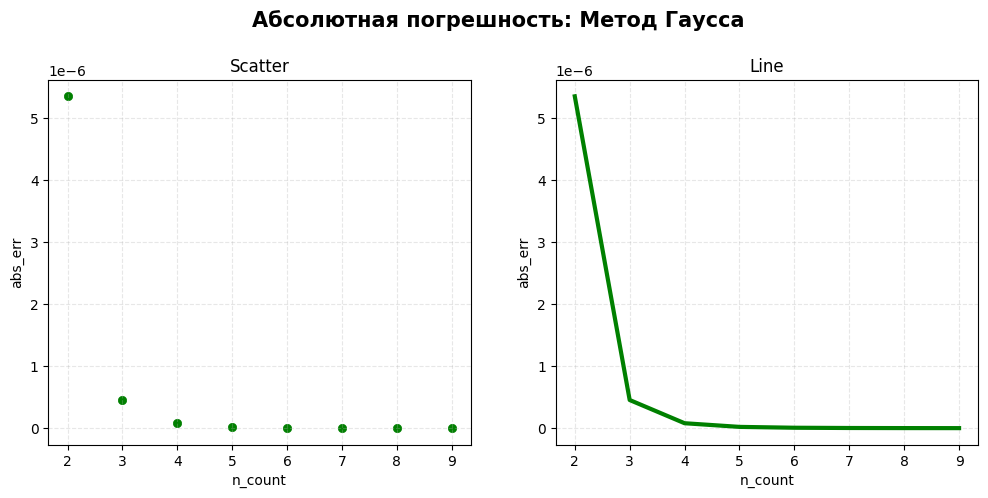

In [ ]:
arr = [abs_metr2(composite_gauss(i)) for i in range(2,10)]
fig, axes = plt.subplots(figsize=(12,5), ncols=2)

axes[0].scatter(x=range(2,10), y=arr,color='green',linewidth=0.5)
axes[0].set_title('Scatter')
axes[0].set_xlabel('n_count')
axes[0].set_ylabel('abs_err')
axes[1].plot(range(2,10), arr,color='green',linewidth=3)
axes[1].set_title('Line')
axes[1].set_xlabel('n_count')
axes[1].set_ylabel('abs_err')
plt.suptitle('Абсолютная погрешность: Метод Гаусса',fontweight='bold',fontsize=15)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[1].grid(True, alpha=0.3, linestyle='--')
plt.subplots_adjust(top=0.84)

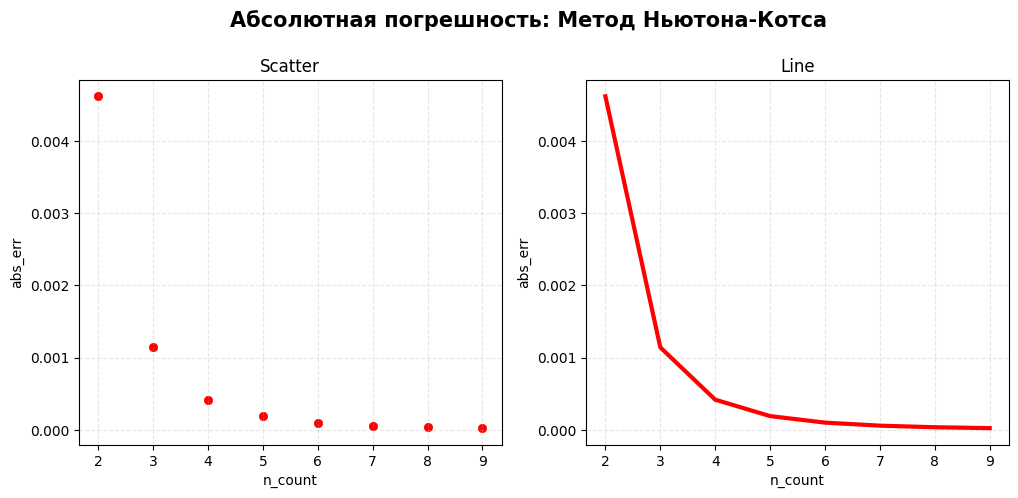

In [ ]:
arr = [abs_metr2(newton_cotes(i)) for i in range(2,10)]
fig, axes = plt.subplots(figsize=(12,5), ncols=2)

axes[0].scatter(x=range(2,10), y=arr,color='red',linewidth=0.5)
axes[0].set_title('Scatter')
axes[0].set_xlabel('n_count')
axes[0].set_ylabel('abs_err')
axes[1].plot(range(2,10), arr,color='red',linewidth=3)
axes[1].set_title('Line')
axes[1].set_xlabel('n_count')
axes[1].set_ylabel('abs_err')
plt.suptitle('Абсолютная погрешность: Метод Ньютона-Котса',fontweight='bold',fontsize=15)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[1].grid(True, alpha=0.3, linestyle='--')
plt.subplots_adjust(top=0.84)

# **Часть №2: Методы оценки погрешности составных квадратурных формул**

# 2.1

Вычислить определенный интеграл с заданной точностью 𝜀 = 10−6 c использованием
составной 3-х-точечной квадратурной формулы Ньютона-Кот(е)са. Погрешность
оценивать методом Ричардсона. На каждых последовательных трёх сетках оценивать
скорость сходимости по правилу Эйткена. Указать длину шага ℎ разбиения интервала
интегрирования, при котором была достигнута требуемая точность 𝜀.

In [ ]:
from math import factorial

def richardson_extrapolation(I_h, I_h2, r=3):
    """
    Экстраполяция Ричардсона для оценки погрешности
    r = 3 для 3-точечной формулы (порядок точности)
    """
    error_estimate = abs(I_h2 - I_h) / (2**r - 1)
    return error_estimate

def aitken_acceleration(I1, I2, I3):
    """
    Ускорение Эйткена для оценки скорости сходимости
    """
    denominator = I3 - 2*I2 + I1
    if abs(denominator) > 1e-15:
        aitken_value = I3 - (I3 - I2)**2 / denominator
        convergence_rate = -np.log(abs((I3 - I2) / (I2 - I1))) / np.log(2)
        return aitken_value, convergence_rate
    else:
        return I3, 0.0

def adaptive_integration(f, a, b, method,epsilon=1e-6, max_iterations=20):
    """
    Адаптивное интегрирование с оценкой погрешности Ричардсона
    и ускорением Эйткена
    """
    print("=" * 80)
    print(f"Интервал: [{a}, {b}], Точность: ε = {epsilon:.1e}")
    print("-" * 80)
    print(f"{'Итерация':<8} {'h':<12} {'Сегменты':<10} {'Интеграл':<15} {'Погрешность':<15} {'Скорость':<10}")
    print("-" * 80)

    # Начальное количество сегментов (кратно 3)
    n_segments = 6
    iterations_data = []

    for iteration in range(max_iterations):
        h_current = (b - a) / n_segments

        I_current = method(n_segments)
        iterations_data.append((n_segments, h_current, I_current))
        if len(iterations_data) >= 2:
            n_prev, h_prev, I_prev = iterations_data[-2]
            error_estimate = richardson_extrapolation(I_prev, I_current)
            if len(iterations_data) >= 3:
                n_prev2, h_prev2, I_prev2 = iterations_data[-3]
                n_prev1, h_prev1, I_prev1 = iterations_data[-2]
                aitken_value, conv_rate = aitken_acceleration(I_prev2, I_prev1, I_current)

                print(f"{iteration+1:<8} {h_current:<12.2e} {n_segments:<10} {I_current:<15.10f} {error_estimate:<15.2e} {conv_rate:<10.4f}")
                if error_estimate < epsilon:
                    print("-" * 80)
                    print(f"Конечное значение интеграла: {I_current:.10f}")
                    print(f"Оценка погрешности: {error_estimate:.2e}")
                    print(f"Шаг h: {h_current:.2e}")
                    print(f"Количество сегментов: {n_segments}")
                    print(f"Количество итераций: {iteration + 1}")
                    return "-" * 80
            else:
                print(f"{iteration+1:<8} {h_current:<12.2e} {n_segments:<10} {I_current:<15.10f} {error_estimate:<15.2e} {'-':<10}")
        else:
            print(f"{iteration+1:<8} {h_current:<12.2e} {n_segments:<10} {I_current:<15.10f} {'-':<15} {'-':<10}")
        n_segments *= 2
        if n_segments % 3 != 0:
            n_segments = (n_segments // 3) * 3

    print("-" * 80)
    print("⚠️ Точность не достигнута за максимальное число итераций")
    return I_current, h_current, n_segments, error_estimate

In [ ]:
adaptive_integration(f2,a,b,newton_cotes)

Интервал: [1.1, 2.5], Точность: ε = 1.0e-06
--------------------------------------------------------------------------------
Итерация h            Сегменты   Интеграл        Погрешность     Скорость  
--------------------------------------------------------------------------------
1        2.33e-01     6          18.6028478879   -               -         
2        1.17e-01     12         18.6029393214   1.31e-05        -         
3        5.83e-02     24         18.6029471364   1.12e-06        3.5484    
4        2.92e-02     48         18.6029477968   9.43e-08        3.5647    
--------------------------------------------------------------------------------
✓ ТРЕБУЕМАЯ ТОЧНОСТЬ ДОСТИГНУТА!
Конечное значение интеграла: 18.6029477968
Оценка погрешности: 9.43e-08
Шаг h: 2.92e-02
Количество сегментов: 48
Количество итераций: 4


'--------------------------------------------------------------------------------'

# 2.2

Выполнить всё, что указано в п. 2.1, используя 3-х-точечные формулы Гаусса вместо формул Ньютона-Кот(е)са.

In [ ]:
adaptive_integration(f2,a,b,composite_gauss)

Интервал: [1.1, 2.5], Точность: ε = 1.0e-06
--------------------------------------------------------------------------------
Итерация h            Сегменты   Интеграл        Погрешность     Скорость  
--------------------------------------------------------------------------------
1        2.33e-01     6          18.6029478504   -               -         
2        1.17e-01     12         18.6029478572   9.71e-10        -         
3        5.83e-02     24         18.6029478573   1.49e-11        6.0265    
--------------------------------------------------------------------------------
✓ ТРЕБУЕМАЯ ТОЧНОСТЬ ДОСТИГНУТА!
Конечное значение интеграла: 18.6029478573
Оценка погрешности: 1.49e-11
Шаг h: 5.83e-02
Количество сегментов: 24
Количество итераций: 3


'--------------------------------------------------------------------------------'

# 2.3

Проведя вычисления (для одной из построенных квадратурных формул из п.2.1-2) по
трём сеткам с малым числом шагов (например, 1, 2 и 4) и используя оценку скорости
сходимости по Эйткену, выбрать шаг ℎ𝑜. Начать расчет с полученного шага и снова
довести вычисления интеграла до требуемой точности 𝜀. Указать шаг разбиения интервала
интегрирования, при котором достигнута требуемая точность, и сравнить его с шагом,
вычисленным в 2.1 или 2.2 (в зависимости от того, какую квадратурную формулу Вы
выбрали для выполнения задания в п. 2.3).

In [ ]:
def estimate_optimal_h(f, a, b, epsilon=1e-6):
    """
    Оценка оптимального шага h0 по трем грубым сеткам с использованием Эйткена
    """
    print("ОЦЕНКА ОПТИМАЛЬНОГО ШАГА ПО ЭЙТКЕНУ")
    print("=" * 60)
    n_list = [3, 6, 12]
    I_list = []
    h_list = []

    print(f"{'Сегменты':<10} {'h':<12} {'Интеграл':<15}")
    print("-" * 40)

    for n in n_list:
        h = (b - a) / n
        I = newton_cotes(n)
        I_list.append(I)
        h_list.append(h)
        print(f"{n:<10} {h:<12.6f} {I:<15.10f}")
    I_aitken, conv_rate = aitken_acceleration(I_list[0], I_list[1], I_list[2])

    print(f"\nУскоренное значение (Эйткен): {I_aitken:.10f}")
    print(f"Скорость сходимости: {conv_rate:.4f}")
    error_estimate = abs(I_list[2] - I_list[1]) / (2**conv_rate - 1)

    if conv_rate > 0 and error_estimate > 0:
        h_current = h_list[2]
        h_optimal = h_current * (epsilon / error_estimate) ** (1 / conv_rate)
        h_optimal = max(h_optimal, 1e-6)
        h_optimal = min(h_optimal, (b - a) / 3)

        n_optimal = int((b - a) / h_optimal)
        n_optimal = (n_optimal // 3) * 3
        if n_optimal < 3:
            n_optimal = 3

        h_optimal = (b - a) / n_optimal

        print(f"\nОценка погрешности: {error_estimate:.2e}")
        print(f"Текущий шаг: {h_current:.6f}")
        print(f"Оцененный оптимальный шаг: {h_optimal:.6f}")
        print(f"Соответствующее количество сегментов: {n_optimal}")

        return h_optimal, n_optimal, I_aitken

def adaptive_integration_with_optimal_start(f, a, b, epsilon=1e-6, max_iterations=15):
    """
    Адаптивное интегрирование с начальным шагом, оцененным по Эйткену
    """
    print("\n" + "=" * 80)
    print("АДАПТИВНОЕ ИНТЕГРИРОВАНИЕ С ОПТИМАЛЬНЫМ НАЧАЛЬНЫМ ШАГОМ")
    print("=" * 80)

    # Шаг 1: Оценка оптимального начального шага
    h_optimal, n_optimal, I_aitken = estimate_optimal_h(f, a, b, epsilon)

    print(f"\nНачинаем вычисления с оптимального шага h = {h_optimal:.6f}")
    print(f"Начальное количество сегментов: {n_optimal}")

    # Шаг 2: Адаптивное интегрирование с найденным начальным шагом
    n_segments = n_optimal
    iterations_data = []
    best_result = None
    best_error = float('inf')

    print("\nАДАПТИВНЫЙ ПРОЦЕСС:")
    print("-" * 80)
    print(f"{'Итерация':<8} {'h':<12} {'Сегменты':<10} {'Интеграл':<15} {'Погрешность':<15} {'Скорость':<10}")
    print("-" * 80)

    for iteration in range(max_iterations):
        h_current = (b - a) / n_segments
        I_current = newton_cotes(n_segments)

        iterations_data.append((n_segments, h_current, I_current))

        # Оценка погрешности методом Ричардсона
        if len(iterations_data) >= 2:
            n_prev, h_prev, I_prev = iterations_data[-2]
            error_estimate = richardson_extrapolation(I_prev, I_current)

            # Сохраняем лучший результат
            if error_estimate < best_error:
                best_error = error_estimate
                best_result = I_current
                best_h = h_current
                best_n = n_segments
                print(best_h, best_n, best_result, best_error)


In [ ]:
adaptive_integration_with_optimal_start(f2, a, b)


АДАПТИВНОЕ ИНТЕГРИРОВАНИЕ С ОПТИМАЛЬНЫМ НАЧАЛЬНЫМ ШАГОМ
ОЦЕНКА ОПТИМАЛЬНОГО ШАГА ПО ЭЙТКЕНУ
Сегменты   h            Интеграл       
----------------------------------------
3          0.466667     18.6018060635  
6          0.233333     18.6028478879  
12         0.116667     18.6029393214  

Ускоренное значение (Эйткен): 18.6029481178
Скорость сходимости: 3.5102

Оценка погрешности: 8.80e-06
Текущий шаг: 0.116667
Оцененный оптимальный шаг: 0.066667
Соответствующее количество сегментов: 21

Начинаем вычисления с оптимального шага h = 0.066667
Начальное количество сегментов: 21

АДАПТИВНЫЙ ПРОЦЕСС:
--------------------------------------------------------------------------------
Итерация h            Сегменты   Интеграл        Погрешность     Скорость  
--------------------------------------------------------------------------------
0.06666666666666667 21 18.60294669605353 0.0
